In [1]:
# python imports
import math, time, random, datetime

# data manipulation
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('dark_background')

In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
# import train & test data
train = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\train.csv')
test = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\test.csv')
gender_submission = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\gender_submission.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64

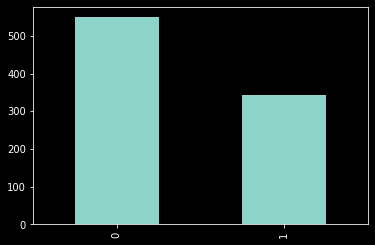

In [4]:
train.Survived.value_counts().plot.bar()
train.Survived.value_counts()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
28.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

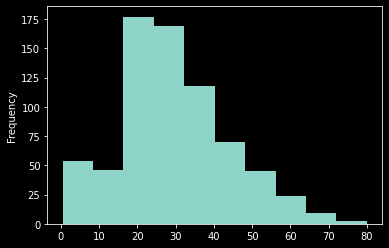

In [5]:
train.Age.plot.hist()
train.Age.value_counts().head(10)

male      577
female    314
Name: Sex, dtype: int64

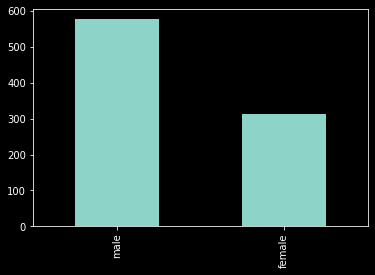

In [6]:
train.Sex.value_counts().plot.bar()
train.Sex.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
Name: Fare, dtype: int64

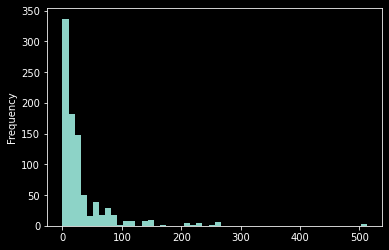

In [7]:
train.Fare.plot.hist(bins=50)
train.Fare.value_counts().head(10)

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

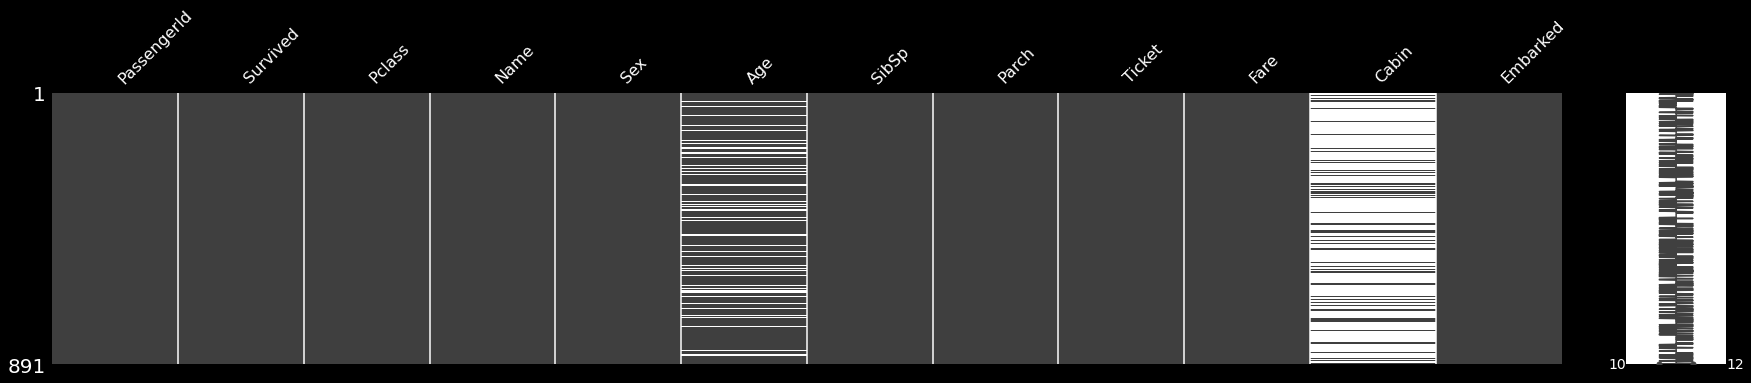

In [11]:
missingno.matrix(train, figsize = (30,5))

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [14]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

##### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


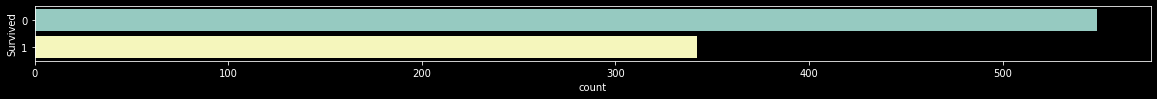

In [15]:
# how many people survived?   
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [16]:
# let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

##### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

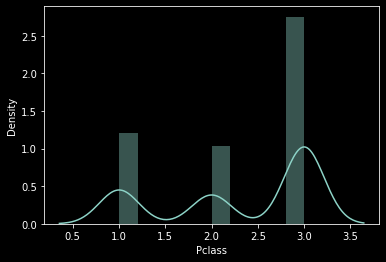

In [17]:
# let's plot the distribution of the Pclass
# the values are numericals but expressed categories
sns.distplot(train.Pclass)

In [18]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

##### Feature: Name
    
Description: The name of the passenger.

In [19]:
# how many different names are there?
train.Name.value_counts()[:10]

Keane, Miss. Nora A                     1
Cherry, Miss. Gladys                    1
Bostandyeff, Mr. Guentcho               1
Farrell, Mr. James                      1
Andersson, Miss. Ingeborg Constanzia    1
Celotti, Mr. Francesco                  1
Carter, Mr. William Ernest              1
Pengelly, Mr. Frederick William         1
Jenkin, Mr. Stephen Curnow              1
Frauenthal, Dr. Henry William           1
Name: Name, dtype: int64

##### Feature: Sex

Description: The sex of the passenger (male or female).

<AxesSubplot:xlabel='count', ylabel='Sex'>

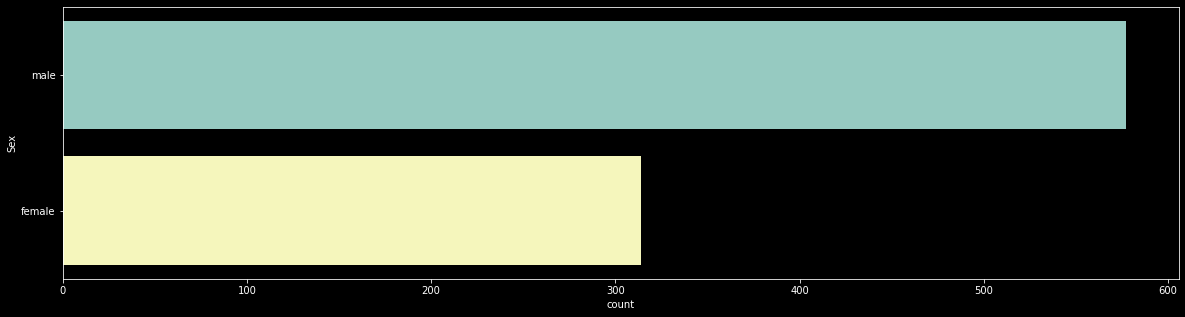

In [20]:
# let's view the distribution of sex
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train)

In [21]:
# let's add sex to the subset dfs
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

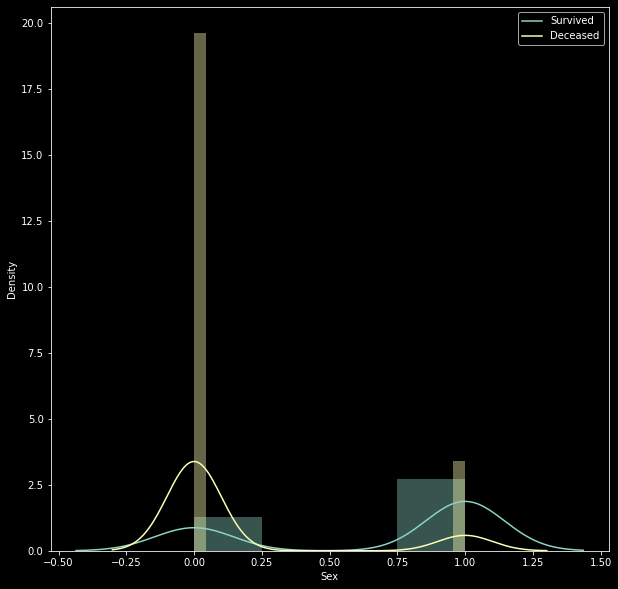

In [22]:
# how does the sex variable look compared to survival?
# we can see this because they're both binaries
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Deceased'})
plt.legend()

##### Feature: Age

Description: The age of the passenger.

In [23]:
# how many missing values does age have?
train.Age.isnull().sum()

177

In [24]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"})
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"})
        plt.legend()

##### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [25]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
# add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

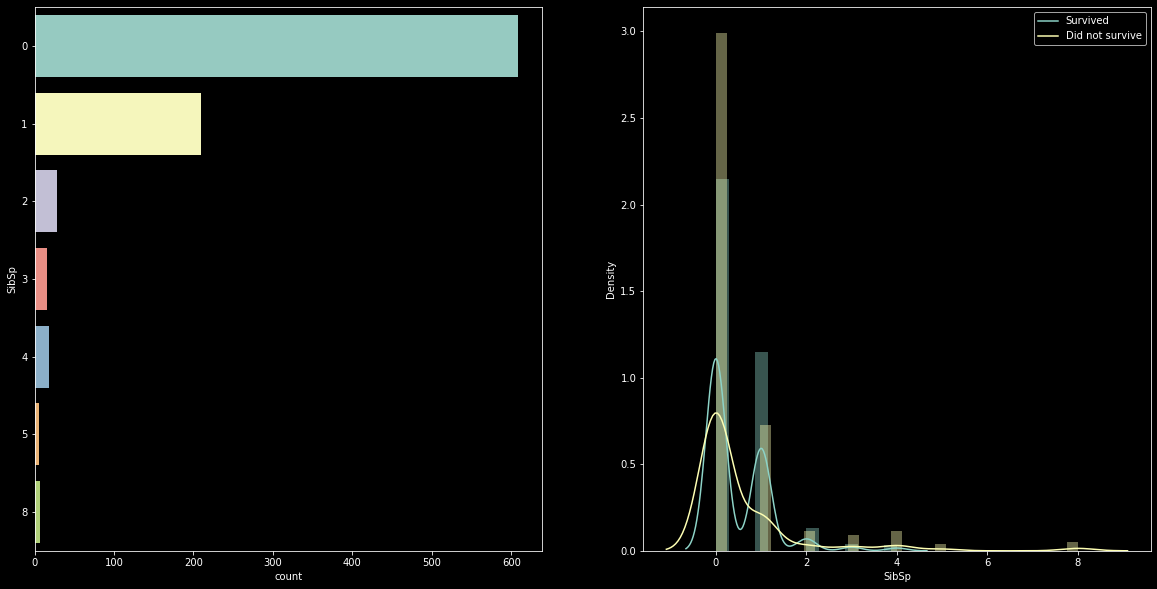

In [27]:
# visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20,10))

##### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

In [28]:
# what values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
# add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

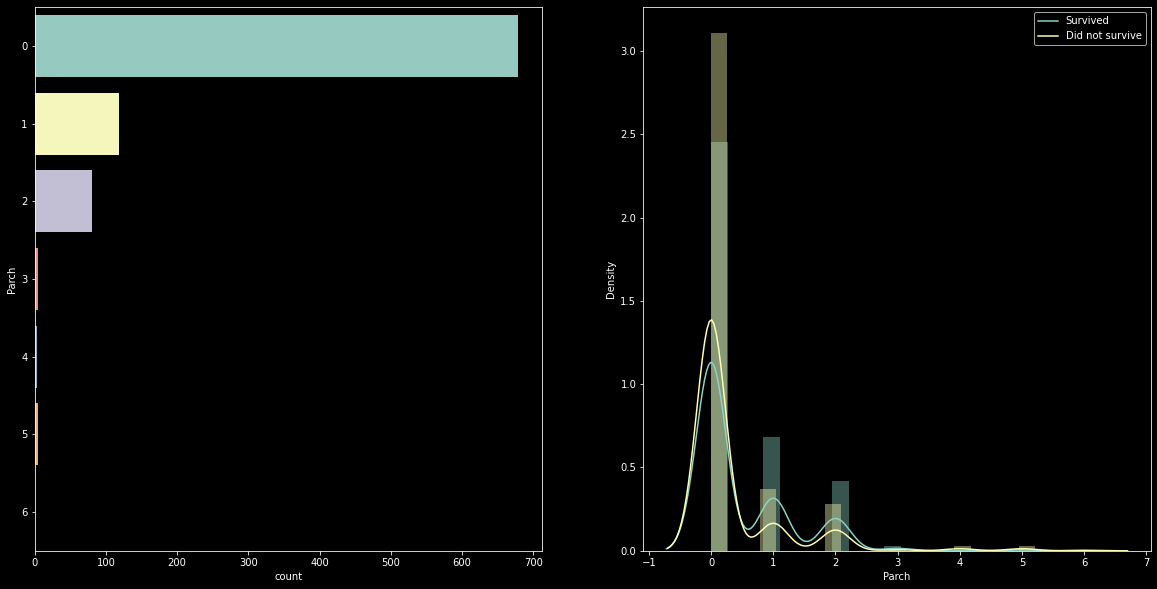

In [30]:
# visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

##### Feature: Ticket

Description: The ticket number of the boarding passenger.

<AxesSubplot:xlabel='count', ylabel='Ticket'>

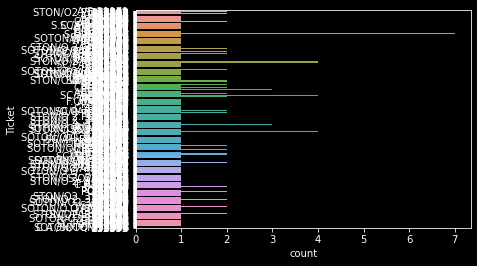

In [31]:
# how many kinds of ticket are there?
sns.countplot(y="Ticket", data=train)

In [32]:
train.Ticket.value_counts().head()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
Name: Ticket, dtype: int64

In [33]:
# how many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


##### Feature: Fare

Description: How much the ticket cost.

<AxesSubplot:xlabel='count', ylabel='Fare'>

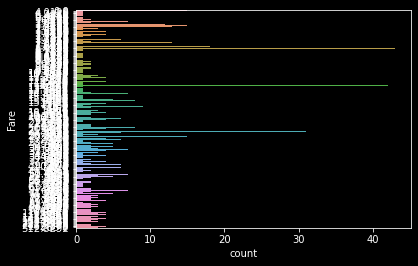

In [34]:
# how many different balues of fare are there?
sns.countplot(y='Fare', data=train)

In [35]:
train.Fare.dtype

dtype('float64')

In [36]:
# how many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [37]:
# add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [38]:
# what do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

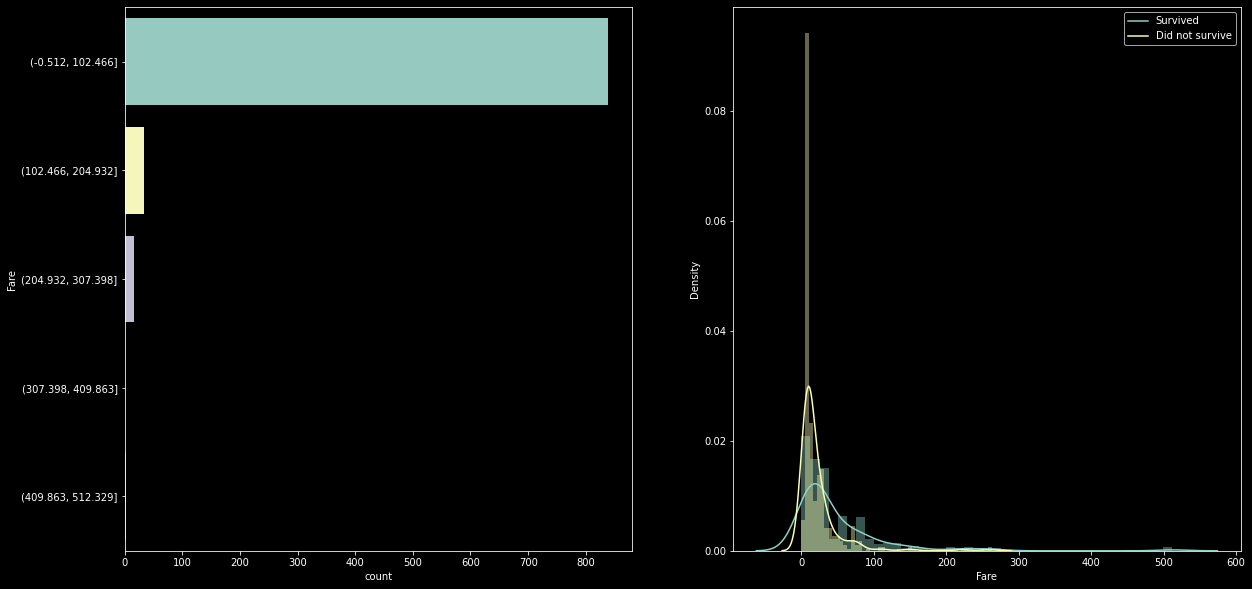

In [39]:
# visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

##### Feature: Cabin

Description: The cabin number where the passenger was staying.  

In [40]:
# how many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [41]:
# what do the Cabin values look like?
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
D9             1
B69            1
C128           1
E46            1
C50            1
Name: Cabin, Length: 147, dtype: int64

##### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [42]:
# how many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [43]:
# what kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

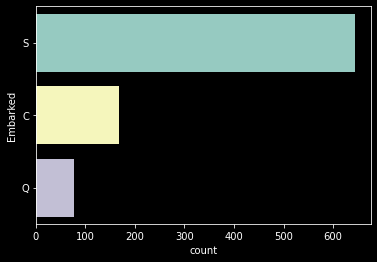

In [44]:
# what do the counts look like?
sns.countplot(y='Embarked', data=train);

In [45]:
# add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [46]:
# remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


##### Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [47]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [48]:
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

df_plcass_one_hot.head()

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [50]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [51]:
# Let's look at df_con_enc
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


##### Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [52]:
# select the data we want to use first for predictions
selected_df = df_con_enc

In [53]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [54]:
# split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [55]:
X_train.shape

(889, 11)

In [56]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [57]:
y_train.shape

(889,)

In [58]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

##### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [59]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # one pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # cross validation
    train_pred = model_selection.cross_val_predict(algo,
                                                   X_train,
                                                   y_train,
                                                   cv=cv,
                                                   n_jobs = -1)
    # cross validation accuracy metrics
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv
                                                

##### Logistic Regression

In [60]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),
                                                 X_train,
                                                 y_train,
                                                 10)

log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.620563


##### K-Nearest Neighbours

In [61]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.147525


##### Gaussian Naive Bayes

In [62]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.052825


##### Linear Support Vector Machines (SVC)

In [63]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 76.49
Running Time: 0:00:00.271626


##### Stochastic Gradient Descent

In [64]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 40.16
Accuracy CV 10-Fold: 72.44
Running Time: 0:00:00.061790


##### Decision Tree Classifier

In [65]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running Time: 0:00:00.097223


##### Gradient Boost Trees

In [66]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.563244


##### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [67]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [68]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [70]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [71]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 195ms	remaining: 3m 14s
1:	learn: 0.6809444	total: 226ms	remaining: 1m 52s
2:	learn: 0.6751692	total: 253ms	remaining: 1m 24s
3:	learn: 0.6689060	total: 277ms	remaining: 1m 8s
4:	learn: 0.6632144	total: 301ms	remaining: 59.9s
5:	learn: 0.6576488	total: 321ms	remaining: 53.1s
6:	learn: 0.6544441	total: 329ms	remaining: 46.7s
7:	learn: 0.6490635	total: 352ms	remaining: 43.7s
8:	learn: 0.6443241	total: 376ms	remaining: 41.4s
9:	learn: 0.6395935	total: 401ms	remaining: 39.7s
10:	learn: 0.6345186	total: 421ms	remaining: 37.9s
11:	learn: 0.6305316	total: 446ms	remaining: 36.7s
12:	learn: 0.6275610	total: 457ms	remaining: 34.7s
13:	learn: 0.6225020	total: 480ms	remaining: 33.8s
14:	learn: 0.6179503	total: 504ms	remaining: 33.1s
15:	learn: 0.6140480	total: 515ms	remaining: 31.7s
16:	learn: 0.6100034	total: 534ms	remaining: 30.9s
17:	learn: 0.6049646	total: 557ms	remaining: 30.4s
18:	learn: 0.6025760	total: 566ms	remaining: 29.2s
19:	lear

164:	learn: 0.4228926	total: 4.19s	remaining: 21.2s
165:	learn: 0.4227463	total: 4.22s	remaining: 21.2s
166:	learn: 0.4226186	total: 4.24s	remaining: 21.2s
167:	learn: 0.4222141	total: 4.26s	remaining: 21.1s
168:	learn: 0.4219366	total: 4.28s	remaining: 21.1s
169:	learn: 0.4216245	total: 4.3s	remaining: 21s
170:	learn: 0.4213900	total: 4.33s	remaining: 21s
171:	learn: 0.4210836	total: 4.35s	remaining: 20.9s
172:	learn: 0.4208199	total: 4.37s	remaining: 20.9s
173:	learn: 0.4206421	total: 4.39s	remaining: 20.9s
174:	learn: 0.4201114	total: 4.42s	remaining: 20.8s
175:	learn: 0.4198212	total: 4.44s	remaining: 20.8s
176:	learn: 0.4195834	total: 4.47s	remaining: 20.8s
177:	learn: 0.4195685	total: 4.47s	remaining: 20.7s
178:	learn: 0.4194809	total: 4.49s	remaining: 20.6s
179:	learn: 0.4191368	total: 4.51s	remaining: 20.5s
180:	learn: 0.4185960	total: 4.53s	remaining: 20.5s
181:	learn: 0.4184559	total: 4.55s	remaining: 20.5s
182:	learn: 0.4180542	total: 4.57s	remaining: 20.4s
183:	learn: 0.417

329:	learn: 0.3926315	total: 7.81s	remaining: 15.8s
330:	learn: 0.3925085	total: 7.83s	remaining: 15.8s
331:	learn: 0.3921820	total: 7.85s	remaining: 15.8s
332:	learn: 0.3920570	total: 7.87s	remaining: 15.8s
333:	learn: 0.3918707	total: 7.89s	remaining: 15.7s
334:	learn: 0.3917635	total: 7.91s	remaining: 15.7s
335:	learn: 0.3916127	total: 7.93s	remaining: 15.7s
336:	learn: 0.3914735	total: 7.96s	remaining: 15.7s
337:	learn: 0.3914486	total: 7.99s	remaining: 15.6s
338:	learn: 0.3912764	total: 8.04s	remaining: 15.7s
339:	learn: 0.3911365	total: 8.07s	remaining: 15.7s
340:	learn: 0.3910828	total: 8.09s	remaining: 15.6s
341:	learn: 0.3910413	total: 8.11s	remaining: 15.6s
342:	learn: 0.3910351	total: 8.12s	remaining: 15.6s
343:	learn: 0.3908388	total: 8.14s	remaining: 15.5s
344:	learn: 0.3907468	total: 8.16s	remaining: 15.5s
345:	learn: 0.3905556	total: 8.18s	remaining: 15.5s
346:	learn: 0.3905329	total: 8.2s	remaining: 15.4s
347:	learn: 0.3904624	total: 8.22s	remaining: 15.4s
348:	learn: 0

494:	learn: 0.3771236	total: 11.1s	remaining: 11.3s
495:	learn: 0.3770363	total: 11.1s	remaining: 11.3s
496:	learn: 0.3769634	total: 11.2s	remaining: 11.3s
497:	learn: 0.3769625	total: 11.2s	remaining: 11.3s
498:	learn: 0.3768613	total: 11.2s	remaining: 11.2s
499:	learn: 0.3768611	total: 11.2s	remaining: 11.2s
500:	learn: 0.3768153	total: 11.2s	remaining: 11.2s
501:	learn: 0.3767849	total: 11.2s	remaining: 11.1s
502:	learn: 0.3765500	total: 11.3s	remaining: 11.1s
503:	learn: 0.3763980	total: 11.3s	remaining: 11.1s
504:	learn: 0.3763692	total: 11.3s	remaining: 11.1s
505:	learn: 0.3763085	total: 11.3s	remaining: 11.1s
506:	learn: 0.3761631	total: 11.3s	remaining: 11s
507:	learn: 0.3760934	total: 11.4s	remaining: 11s
508:	learn: 0.3760498	total: 11.4s	remaining: 11s
509:	learn: 0.3760150	total: 11.4s	remaining: 11s
510:	learn: 0.3759970	total: 11.5s	remaining: 11s
511:	learn: 0.3759798	total: 11.5s	remaining: 11s
512:	learn: 0.3759568	total: 11.5s	remaining: 10.9s
513:	learn: 0.3758344	to

653:	learn: 0.3644317	total: 14.6s	remaining: 7.75s
654:	learn: 0.3644178	total: 14.6s	remaining: 7.71s
655:	learn: 0.3642661	total: 14.7s	remaining: 7.69s
656:	learn: 0.3642146	total: 14.7s	remaining: 7.68s
657:	learn: 0.3642143	total: 14.7s	remaining: 7.65s
658:	learn: 0.3641970	total: 14.8s	remaining: 7.63s
659:	learn: 0.3641835	total: 14.8s	remaining: 7.61s
660:	learn: 0.3641783	total: 14.8s	remaining: 7.59s
661:	learn: 0.3640790	total: 14.8s	remaining: 7.57s
662:	learn: 0.3640602	total: 14.8s	remaining: 7.54s
663:	learn: 0.3639463	total: 14.9s	remaining: 7.53s
664:	learn: 0.3639302	total: 14.9s	remaining: 7.51s
665:	learn: 0.3638903	total: 14.9s	remaining: 7.49s
666:	learn: 0.3637239	total: 15s	remaining: 7.47s
667:	learn: 0.3635881	total: 15s	remaining: 7.45s
668:	learn: 0.3634772	total: 15s	remaining: 7.43s
669:	learn: 0.3634068	total: 15s	remaining: 7.41s
670:	learn: 0.3633759	total: 15.1s	remaining: 7.38s
671:	learn: 0.3631802	total: 15.1s	remaining: 7.36s
672:	learn: 0.363102

817:	learn: 0.3534612	total: 18.2s	remaining: 4.05s
818:	learn: 0.3533902	total: 18.3s	remaining: 4.04s
819:	learn: 0.3533072	total: 18.3s	remaining: 4.01s
820:	learn: 0.3532730	total: 18.3s	remaining: 3.99s
821:	learn: 0.3531556	total: 18.3s	remaining: 3.97s
822:	learn: 0.3531526	total: 18.3s	remaining: 3.94s
823:	learn: 0.3530893	total: 18.4s	remaining: 3.92s
824:	learn: 0.3528000	total: 18.4s	remaining: 3.9s
825:	learn: 0.3527557	total: 18.4s	remaining: 3.88s
826:	learn: 0.3527494	total: 18.4s	remaining: 3.85s
827:	learn: 0.3527097	total: 18.4s	remaining: 3.83s
828:	learn: 0.3525818	total: 18.5s	remaining: 3.81s
829:	learn: 0.3525719	total: 18.5s	remaining: 3.79s
830:	learn: 0.3523327	total: 18.5s	remaining: 3.76s
831:	learn: 0.3523023	total: 18.5s	remaining: 3.74s
832:	learn: 0.3522949	total: 18.5s	remaining: 3.72s
833:	learn: 0.3521358	total: 18.6s	remaining: 3.69s
834:	learn: 0.3521053	total: 18.6s	remaining: 3.67s
835:	learn: 0.3520985	total: 18.6s	remaining: 3.65s
836:	learn: 0

979:	learn: 0.3413289	total: 22.1s	remaining: 450ms
980:	learn: 0.3412959	total: 22.1s	remaining: 428ms
981:	learn: 0.3412873	total: 22.1s	remaining: 405ms
982:	learn: 0.3411125	total: 22.1s	remaining: 383ms
983:	learn: 0.3410429	total: 22.2s	remaining: 360ms
984:	learn: 0.3408345	total: 22.2s	remaining: 338ms
985:	learn: 0.3407755	total: 22.2s	remaining: 315ms
986:	learn: 0.3405983	total: 22.2s	remaining: 293ms
987:	learn: 0.3404887	total: 22.2s	remaining: 270ms
988:	learn: 0.3404766	total: 22.3s	remaining: 248ms
989:	learn: 0.3404401	total: 22.3s	remaining: 225ms
990:	learn: 0.3403797	total: 22.3s	remaining: 203ms
991:	learn: 0.3403515	total: 22.3s	remaining: 180ms
992:	learn: 0.3402624	total: 22.4s	remaining: 158ms
993:	learn: 0.3402175	total: 22.4s	remaining: 135ms
994:	learn: 0.3399939	total: 22.4s	remaining: 113ms
995:	learn: 0.3399342	total: 22.5s	remaining: 90.2ms
996:	learn: 0.3398669	total: 22.5s	remaining: 67.7ms
997:	learn: 0.3398219	total: 22.5s	remaining: 45.1ms
998:	lear

##### Perform CatBoost cross-validation

In [72]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

139:	learn: 0.3789390	test: 0.4378660	best: 0.4375885 (133)
140:	learn: 0.3786555	test: 0.4378720	best: 0.4375885 (133)
141:	learn: 0.3784076	test: 0.4378774	best: 0.4375885 (133)
142:	learn: 0.3780534	test: 0.4378525	best: 0.4375885 (133)
143:	learn: 0.3777646	test: 0.4376841	best: 0.4375885 (133)
144:	learn: 0.3775321	test: 0.4378089	best: 0.4375885 (133)
145:	learn: 0.3772125	test: 0.4377624	best: 0.4375885 (133)
146:	learn: 0.3769816	test: 0.4376400	best: 0.4375885 (133)
147:	learn: 0.3767073	test: 0.4376571	best: 0.4375885 (133)
148:	learn: 0.3765399	test: 0.4376666	best: 0.4375885 (133)
149:	learn: 0.3762756	test: 0.4376520	best: 0.4375885 (133)
150:	learn: 0.3761288	test: 0.4377161	best: 0.4375885 (133)
151:	learn: 0.3759425	test: 0.4377006	best: 0.4375885 (133)
152:	learn: 0.3756349	test: 0.4378041	best: 0.4375885 (133)
153:	learn: 0.3754100	test: 0.4378911	best: 0.4375885 (133)
154:	learn: 0.3751414	test: 0.4379486	best: 0.4375885 (133)
155:	learn: 0.3748791	test: 0.4380754	be

285:	learn: 0.3423478	test: 0.4382080	best: 0.4375885 (133)
286:	learn: 0.3421475	test: 0.4380605	best: 0.4375885 (133)
287:	learn: 0.3419452	test: 0.4379682	best: 0.4375885 (133)
288:	learn: 0.3415879	test: 0.4380046	best: 0.4375885 (133)
289:	learn: 0.3413856	test: 0.4380394	best: 0.4375885 (133)
290:	learn: 0.3411096	test: 0.4381882	best: 0.4375885 (133)
291:	learn: 0.3408025	test: 0.4382502	best: 0.4375885 (133)
292:	learn: 0.3405731	test: 0.4381057	best: 0.4375885 (133)
293:	learn: 0.3403689	test: 0.4381146	best: 0.4375885 (133)
294:	learn: 0.3400989	test: 0.4381356	best: 0.4375885 (133)
295:	learn: 0.3398965	test: 0.4380011	best: 0.4375885 (133)
296:	learn: 0.3396538	test: 0.4379419	best: 0.4375885 (133)
297:	learn: 0.3393595	test: 0.4379482	best: 0.4375885 (133)
298:	learn: 0.3391208	test: 0.4379958	best: 0.4375885 (133)
299:	learn: 0.3388870	test: 0.4378542	best: 0.4375885 (133)
300:	learn: 0.3386254	test: 0.4377301	best: 0.4375885 (133)
301:	learn: 0.3384212	test: 0.4378290	be

430:	learn: 0.3063892	test: 0.4334690	best: 0.4333976 (427)
431:	learn: 0.3062245	test: 0.4335169	best: 0.4333976 (427)
432:	learn: 0.3059580	test: 0.4333669	best: 0.4333669 (432)
433:	learn: 0.3056850	test: 0.4335092	best: 0.4333669 (432)
434:	learn: 0.3054192	test: 0.4335065	best: 0.4333669 (432)
435:	learn: 0.3052204	test: 0.4334206	best: 0.4333669 (432)
436:	learn: 0.3050698	test: 0.4335151	best: 0.4333669 (432)
437:	learn: 0.3047879	test: 0.4334492	best: 0.4333669 (432)
438:	learn: 0.3046007	test: 0.4333917	best: 0.4333669 (432)
439:	learn: 0.3044894	test: 0.4334150	best: 0.4333669 (432)
440:	learn: 0.3043265	test: 0.4335227	best: 0.4333669 (432)
441:	learn: 0.3041210	test: 0.4334722	best: 0.4333669 (432)
442:	learn: 0.3039089	test: 0.4333488	best: 0.4333488 (442)
443:	learn: 0.3037218	test: 0.4334071	best: 0.4333488 (442)
444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)
446:	learn: 0.3031330	test: 0.4332800	be

565:	learn: 0.2805555	test: 0.4327596	best: 0.4320750 (502)
566:	learn: 0.2803450	test: 0.4326869	best: 0.4320750 (502)
567:	learn: 0.2802396	test: 0.4327315	best: 0.4320750 (502)
568:	learn: 0.2800372	test: 0.4327737	best: 0.4320750 (502)
569:	learn: 0.2798955	test: 0.4327171	best: 0.4320750 (502)
570:	learn: 0.2797142	test: 0.4327944	best: 0.4320750 (502)
571:	learn: 0.2795052	test: 0.4327580	best: 0.4320750 (502)
572:	learn: 0.2793476	test: 0.4327594	best: 0.4320750 (502)
573:	learn: 0.2792016	test: 0.4327965	best: 0.4320750 (502)
574:	learn: 0.2790102	test: 0.4328137	best: 0.4320750 (502)
575:	learn: 0.2788207	test: 0.4327985	best: 0.4320750 (502)
576:	learn: 0.2786421	test: 0.4327223	best: 0.4320750 (502)
577:	learn: 0.2784512	test: 0.4326129	best: 0.4320750 (502)
578:	learn: 0.2782333	test: 0.4326789	best: 0.4320750 (502)	total: 2m 28s	remaining: 1m 47s
579:	learn: 0.2781486	test: 0.4326991	best: 0.4320750 (502)
580:	learn: 0.2780042	test: 0.4327089	best: 0.4320750 (502)
581:	lea

700:	learn: 0.2597981	test: 0.4334144	best: 0.4320750 (502)
701:	learn: 0.2596849	test: 0.4334274	best: 0.4320750 (502)
702:	learn: 0.2595497	test: 0.4334090	best: 0.4320750 (502)
703:	learn: 0.2594238	test: 0.4333859	best: 0.4320750 (502)
704:	learn: 0.2593448	test: 0.4334076	best: 0.4320750 (502)
705:	learn: 0.2592205	test: 0.4334116	best: 0.4320750 (502)
706:	learn: 0.2590820	test: 0.4333826	best: 0.4320750 (502)
707:	learn: 0.2590055	test: 0.4334517	best: 0.4320750 (502)
708:	learn: 0.2588383	test: 0.4333775	best: 0.4320750 (502)
709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)
711:	learn: 0.2584578	test: 0.4335655	best: 0.4320750 (502)
712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)
716:	learn: 0.2578844	test: 0.4335876	be

837:	learn: 0.2416726	test: 0.4353085	best: 0.4320750 (502)
838:	learn: 0.2415501	test: 0.4354175	best: 0.4320750 (502)
839:	learn: 0.2414294	test: 0.4353851	best: 0.4320750 (502)
840:	learn: 0.2413165	test: 0.4353025	best: 0.4320750 (502)
841:	learn: 0.2411928	test: 0.4354952	best: 0.4320750 (502)
842:	learn: 0.2410840	test: 0.4354942	best: 0.4320750 (502)
843:	learn: 0.2409526	test: 0.4356010	best: 0.4320750 (502)
844:	learn: 0.2408454	test: 0.4355452	best: 0.4320750 (502)
845:	learn: 0.2406890	test: 0.4356634	best: 0.4320750 (502)
846:	learn: 0.2406116	test: 0.4356938	best: 0.4320750 (502)
847:	learn: 0.2404884	test: 0.4357277	best: 0.4320750 (502)	total: 3m 42s	remaining: 39.9s
848:	learn: 0.2403918	test: 0.4357099	best: 0.4320750 (502)
849:	learn: 0.2402659	test: 0.4356297	best: 0.4320750 (502)
850:	learn: 0.2401384	test: 0.4355980	best: 0.4320750 (502)
851:	learn: 0.2400293	test: 0.4356133	best: 0.4320750 (502)
852:	learn: 0.2399076	test: 0.4355977	best: 0.4320750 (502)
853:	lear

978:	learn: 0.2263260	test: 0.4374216	best: 0.4320750 (502)
979:	learn: 0.2262412	test: 0.4373731	best: 0.4320750 (502)
980:	learn: 0.2261256	test: 0.4373425	best: 0.4320750 (502)
981:	learn: 0.2259895	test: 0.4373218	best: 0.4320750 (502)
982:	learn: 0.2258660	test: 0.4373298	best: 0.4320750 (502)
983:	learn: 0.2257740	test: 0.4373625	best: 0.4320750 (502)
984:	learn: 0.2256780	test: 0.4374106	best: 0.4320750 (502)
985:	learn: 0.2255904	test: 0.4374640	best: 0.4320750 (502)
986:	learn: 0.2254298	test: 0.4373695	best: 0.4320750 (502)
987:	learn: 0.2253439	test: 0.4374049	best: 0.4320750 (502)
988:	learn: 0.2252628	test: 0.4374450	best: 0.4320750 (502)
989:	learn: 0.2251728	test: 0.4375035	best: 0.4320750 (502)
990:	learn: 0.2249700	test: 0.4375048	best: 0.4320750 (502)
991:	learn: 0.2248979	test: 0.4375301	best: 0.4320750 (502)
992:	learn: 0.2247888	test: 0.4374754	best: 0.4320750 (502)
993:	learn: 0.2246296	test: 0.4374720	best: 0.4320750 (502)
994:	learn: 0.2245236	test: 0.4375650	be

In [73]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:04:26.602145


##### Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

##### Regular accuracy scores

In [74]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [acc_knn, acc_log, acc_gaussian, acc_sgd,
              acc_linear_svc, acc_dt, acc_gbt, acc_catboost]})

print("Regular Accuracy Scores")
models.sort_values(by='Score', ascending=False)

Regular Accuracy Scores


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,79.08
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,40.16


In [75]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [acc_cv_knn, acc_cv_log, acc_cv_gaussian, acc_cv_sgd,
              acc_cv_linear_svc, acc_cv_dt, acc_cv_gbt, acc_cv_catboost]})

print('Cross-validation Accuracy Scores')
cv_models.sort_values(by='Score', ascending=False)

Cross-validation Accuracy Scores


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.31
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,76.49
3,Stochastic Gradient Decent,72.44


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

##### Feature Importance
Which features of the best model were most important for making predictions?

In [76]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


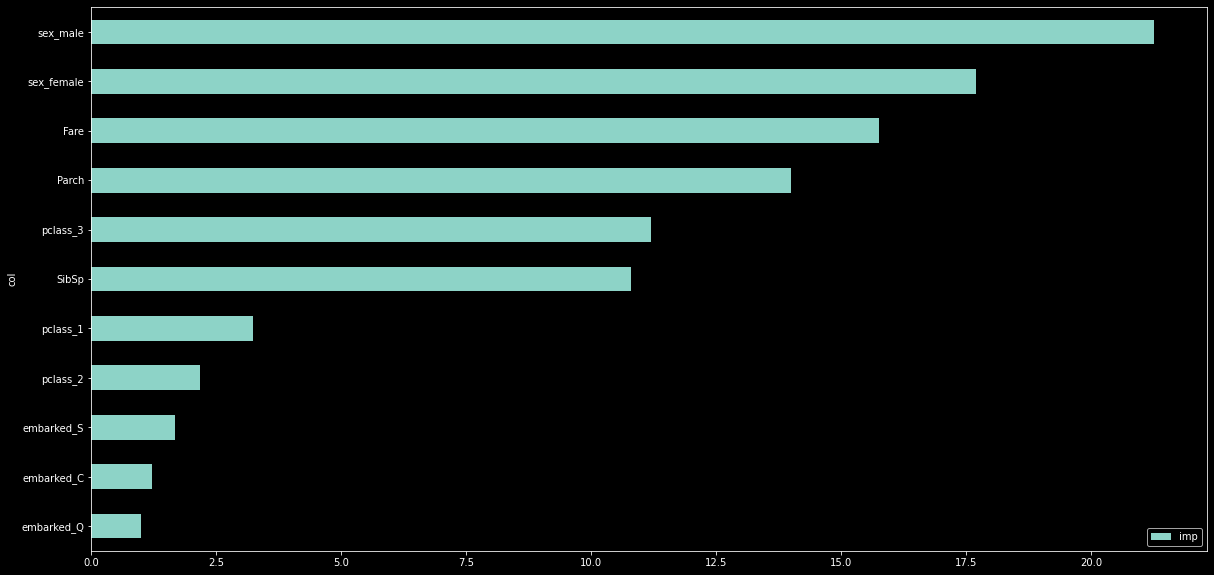

In [77]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

##### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

##### Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [78]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

##### Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [79]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [80]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [82]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [83]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in `test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [84]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [85]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [86]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [87]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [88]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [90]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [91]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [92]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [93]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
